In [19]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

In [20]:
# read the data file
fileName="Data.txt"
#electrode1,electrode2 = np.loadtxt(filename, delimiter=" ")
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

electrode1,electrode2 = Read_Two_Column_File(fileName)



samplingRate= 24414

In [21]:
#Let's visualize the electrodes readings 
print(len(electrode1))
print(len(electrode2))

4417524
4417524


In [4]:
x_values = range(0,len(electrode1))

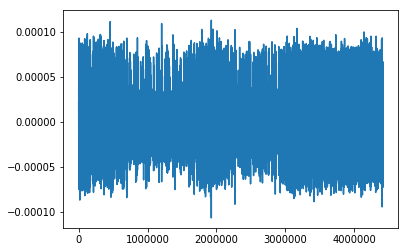

In [5]:
plt.plot(x_values,electrode1)

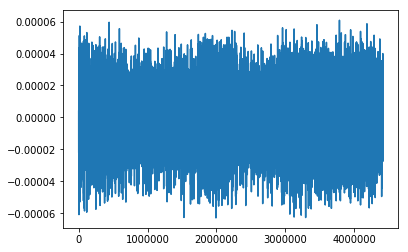

In [6]:
plt.plot(x_values,electrode2)

Text(0.5,1,'electrode2')

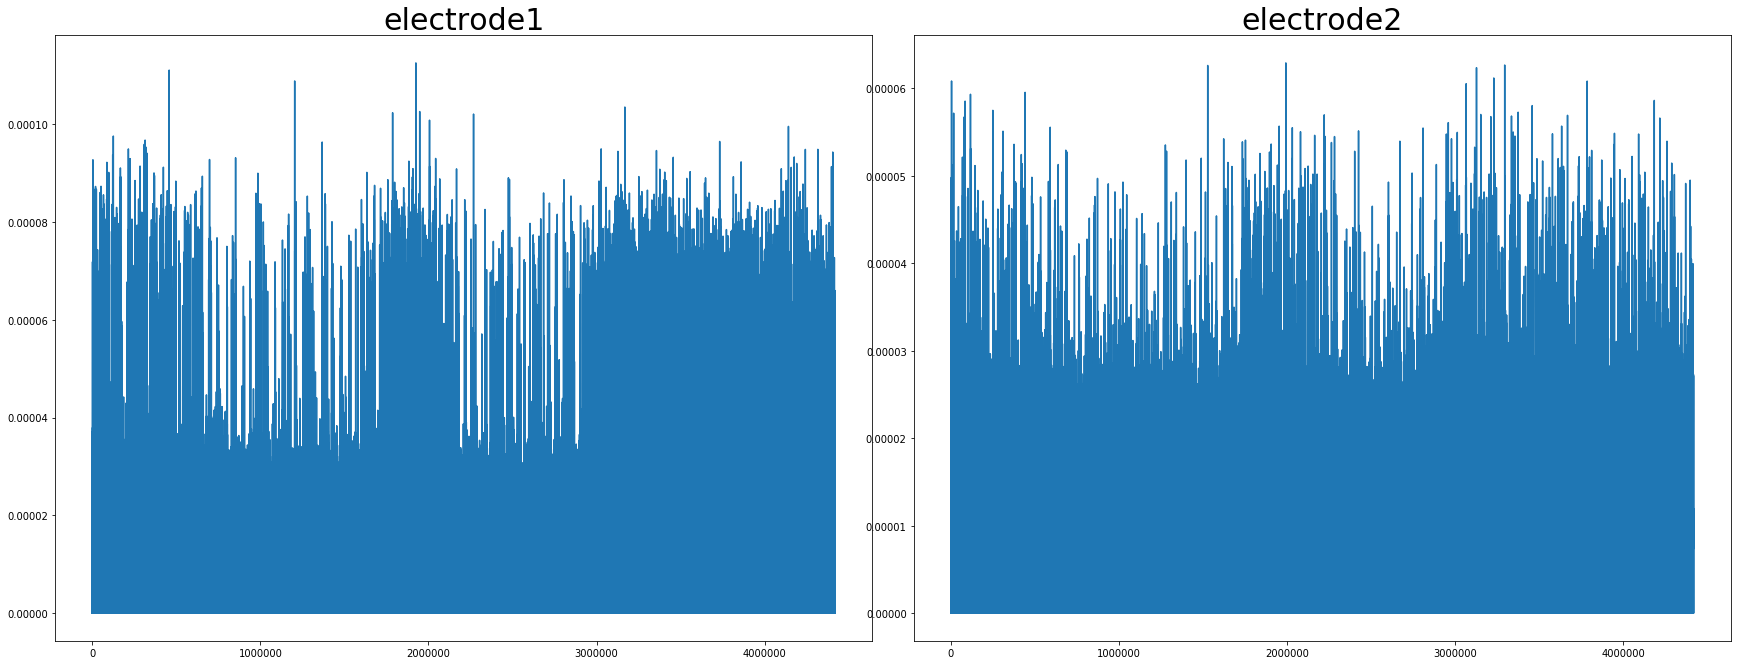

In [7]:
electrode1Abs= np.absolute(electrode1)
electrode2Abs= np.absolute(electrode2)

f2, (ax3,ax4)=plt.subplots(1,2,figsize=(24,9))
f2.tight_layout()

ax3.plot(x_values,electrode1)
ax3.set_title('electrode1',fontsize=30)

ax4.plot(x_values,electrode2)
ax4.set_title('electrode2',fontsize=30)


In [8]:
sd1 = np.std(electrode1[:500])
sd2 = np.std(electrode2[:500])
print(sd1,sd2)

5.04600290691e-06 4.59454697337e-06


In [9]:
thresh1, thresh2=sd1*3.5 ,sd2*3.5
print(thresh1, thresh2)

1.76610101742e-05 1.60809144068e-05


In [10]:
# def smoothing(squares,window_size=31):
    
#     N=window_size
#     smooth=np.zeros((squares.shape[0]))
#     for i in range(N//2,(squares.shape[0]-(N//2))):
        
#         sum=0
#         for j in range (i-(N//2), i+(N//2)):
            
#             sum=sum+squares[j]
#         smooth[i]=(1/N)*sum
#     return smooth

# smoothedElectrode1= smoothing(electrode1,48)
# smoothedElectrode2=  smoothing(electrode2,48)

# f2, (ax3,ax4)=plt.subplots(1,2,figsize=(24,9))
# f2.tight_layout()

# ax3.plot(x_values,smoothedElectrode1)
# ax3.set_title('electrode1',fontsize=30)

# ax4.plot(x_values,smoothedElectrode2)
# ax4.set_title('electrode2',fontsize=30)


In [11]:
# print(smoothedElectrode1.shape)
# smoothedElectrode= np.array(smoothedElectrode1)
# print(smoothedElectrode.shape)

In [12]:
def getSpikes(electrode,thresh , noSamples=48):
    
    spikes=[]
        
    for i in range(0,len(electrode)-noSamples, noSamples):
        
        peak= max(electrode[i:i+noSamples])
        #print(peak)
        
        if peak>= thresh :
            #print('YES BIGGER THAN THRESH')
            peakIndex=np.where(electrode[i:i+noSamples]== peak)
            #print('I AM PEAK INDEXXXXXXX ', peakIndex,peakIndex[0][0])
            #np.append(spikes,electrode[peakIndex[0][0]-noSamples//2,peakIndex[0][0]+noSamples//2])
            #print(spikes)
            #print(electrode[(29-noSamples//2):(29+noSamples//2)])
            spikes.append(electrode[(peakIndex[0][0]-noSamples//2):(peakIndex[0][0]+noSamples//2)])
        else:
            pass
    return spikes




            
        
spikes=getSpikes (electrode1, thresh1)
print(len(spikes))


        
    

70152


In [13]:
#print(np.array(spikes))

(70152,)



KeyboardInterrupt



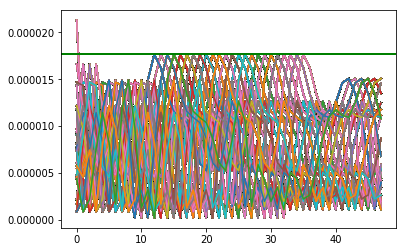

In [18]:
#print(len(spikes), spikes)
#spikes=getSpikes (electrode1, thresh1)
print(np.array(spikes).shape)
spikes=np.array(spikes)
for i in range(spikes.shape[0]):
    try:
        plt.axhline(y=thresh1, color='g', linestyle='-')
        plt.plot(x_values[0:spikes[i].shape[0]],spikes[i])
    except TypeError:
        print('couldnt plot this one')

In [ ]:
#NOW let's align the vector of spikes 
from scipy.ndimage.interpolation import shift

def alignSpikes (spikes, alignmentIndex=20):
    shiftedSpikes=[]

    for i in range(spikes.shape[0]):



        maxindex= np.argmax(spikes[i])


        shiftAmount= -1* (maxindex- alignmentIndex +1)


        shiftedSpikes.append(shift(spikes[i], shiftAmount, cval=0))
        #print(shiftedSpikes[i])

    return np.array(shiftedSpikes)


shiftedSpikes = alignSpikes(spikes)
